# Analyse numérique, Travail n°2 : Maxwell.

## Lemaigre Guillaume & Dimitrov Rossen

## 1) Equation de diffusion

On commence par établir nos 3 équations de départ : 
$$\nabla \times {\bf E} = -\partial_t {\bf B}\\
\nabla \times {\bf B} =\mu {\bf J}\\
\nabla \cdot {\bf B}=0
$$
Et dans le cas quasi-stationnaire : $${\bf J}=\sigma {\bf E}$$

Observons que l'on peut réécrire la deuxième équation comme $$ \nabla \times {\bf B} = \mu \sigma {\bf E} \Leftrightarrow {\bf E} = \frac{\nabla \times {\bf B}}{\mu \sigma}$$

En remplaçant celle-ci dans la première, nous trouvons: $$ -\partial_t {\bf B} = \frac{\nabla \times \left( \nabla \times {\bf B} \right)}{\mu \sigma}$$

En vertue du fait que $ \nabla \times \left( \nabla \times {\bf A} \right) = \nabla \left( \nabla \cdot {\bf A} \right) -  \nabla^2 {\bf A} $ et que $\nabla \cdot {\bf B}=0$.
Ceci nous donne :

$$ \partial_t {\bf B} = \frac{1}{\mu \sigma}\Delta {\bf B}$$

Ce qui correspond bien à une équation de diffusion, avec $\frac{1}{\mu \sigma}$ comme coefficient de diffusion.

## 2) Conditions aux bords

#### 1: surface intérieur du suppraconducteur :
Dans un premier temps, avant d'appliquer le courant sur la surface du conducteur, le champ magnétique est nul partout. 
Or dans le suppraconducteur, nous avons $\sigma = \infty$, ce qui nous donne: 

$$ \partial_t {\bf B} = 0 $$

Comme le champ est nul au départ et qu'il ne varie pas, il reste nul tout le temps, et nous avons donc $${\bf B} = 0$$

C'est une condition au bord de Dirichlet.

#### 2 : Bord du suppraconducteur avec le conducteur :

Nous devons considérer les conditions au bords du champ électrique :
$${\bf n_{1,2}} \times \left( {\bf E_1} - {\bf E_2} \right) = {\bf 0} $$ où ${\bf n_{1,2}}$ est le vecteur normal entrant dans le suppraconducteur depuis le conducteur.

Cependant, comme dans le suppraconducteur, $\sigma = \infty $, nous avons que $${\bf E_1}= \frac{\bf J_1}{\sigma} \rightarrow {\bf E_1} = 0 $$

Nous avons donc la condition que $$ {\bf n_{1,2}} \times {\bf E_2} = \bf 0 $$

Ce qui peut s'écrire comme : $$ {\bf n_{1,2}} \times \left( \nabla \times {\bf B_2} \right) = \bf 0 $$

En développant le rotationnel, et en sachant que ${\bf B_y} = 0 = {\bf B_x} $, nous trouvons que :

- Pour les bords verticaux : $\partial_x {\bf B_{2,z}} = 0 $
- Pour les bords horizontaux : $\partial_y {\bf B_{2,z}} = 0 $

C'est une condition au bord de Neumann. 

#### 3 : Bord extérieur du conducteur :

En utilisant les conditions au bords du champ magnétique, avons dans un premier temps que :
$$ {\bf n_{1,0}} \times \left( {\bf B_0}-{\bf B_1} \right) = \mu_0 {\bf J} $$
Où $\bf n_{1,0}$ est le vecteur normal sortant du conducteur vers l'extérieur. 

Cependant, nous savons que le champ magnétique à l'extérieur du conducteur est nul. Nous avons donc : 
$$ {\bf n_{1,0}} \times -{\bf B_1} = \mu_o \bf J $$

En développant pour chaque bords, nous trouvons la même condition que :
$$\bf B_z = -\mu_0 $$

C'est une condition au bord de Dirichlet. 

## 3) Calcul de la diffusion

$$\begin{equation}
\frac{\partial B}{\partial t} = \alpha \left(\frac{\partial^2 B}{\partial x^2} + \frac{\partial^2 B}{\partial y^2} \right)
\end{equation}$$

où $ \alpha = \frac{1}{\mu \sigma} $

La méthode d'Euler (forward) dans le temps avec une discrétisation centrée d'ordre 2 pour le laplacien s'écrit ainsi:
$$
B^{n+1}_{i,j}= B^n_{i,j} + \alpha \left( \frac{\Delta t}{\Delta x^2} (B^n_{i+1, j} - 2B^n_{i,j} + B^n_{i-1,j}) + \frac{\Delta t}{\Delta y^2} (B^n_{i, j+1} - 2B^n_{i,j} + B^n_{i,j-1})\right)
$$

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from matplotlib import animation
from IPython.display import HTML

In [2]:
mu = 1.26e-6
sigma = 5.96e7
alpha = 1/(mu*sigma)

L = 1.5e-2
H = 1.5e-2

nx = 121
ny = 121
nt = 50000 #nombre de step pour 2.5e-2s

dx = L/(nx-1)
dy = H/(ny-1)
dt = 2.5e-7

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

#### Justification de la valeur de "dt" :

avec un $\Delta t$ de cette valeur nous pouvons nous assurer que: $$\alpha \frac{\Delta t}{(\Delta x)^2} + \alpha \frac{\Delta t}{(\Delta y)^2} < \frac{1}{2}.$$ Ce qui satisfait la condition de stabilité de convergence de notre solution. 

La valeur que cela nous donne est de 0.42612123149035896.

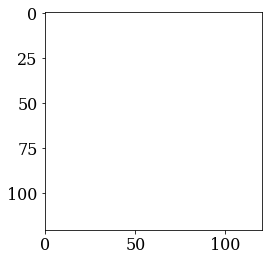

In [3]:
#On définit notre array 121x121.
B = numpy.zeros((ny, nx))

#on prépare déjà la mise en oeuvre de l'animation. 
fig = pyplot.figure()
ims = []
    
#Forward (temps) + centrée d'ordre 2 (x et y).    
for n in range(nt):
    Bn = B.copy()
    B[1:-1,1:-1] = Bn[1:-1,1:-1] + alpha *\
        (dt/dy**2 * (Bn[2:,1:-1] - 2*Bn[1:-1,1:-1] + Bn[:-2,1:-1]) +\
         dt/dx**2 * (Bn[1:-1,2:] - 2*Bn[1:-1,1:-1] + Bn[1:-1,:-2]))
  
    #Conditions au Bord de Dirichlet extérieur. 
    B[0,:] = -mu
    B[-1,:] = -mu
    B[:,0] = -mu
    B[:,-1] = -mu
    
    #Dirichlet supraconduteur.     
    B[40:80,40:80] = 0
    
    #Neumann interface conducteur/supraconducteur. 
    B[40,40:80] = B[39,40:80]
    B[80,40:80] = B[81,40:80]
    B[40:80,40] = B[40:80,39]
    B[40:80,80] = B[40:80,81]
    

    #comme ça on ne prend pas toutes les images pour l'animation, juste une sur 50. (sinon c'est trop long)
    if ((n/50)-int(n/50)) == 0 :
        im = pyplot.imshow(B, animated=True)
        ims.append([im])

        
    #valeur en 2.5*10^-3 s.
    if n == 5000 :
        b = B[2,2]
        jx = (B[3,2]-B[1,2])/(2*dy*mu)
        jy = (B[2,1]-B[2,3])/(2*dx*mu)
        
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=100)

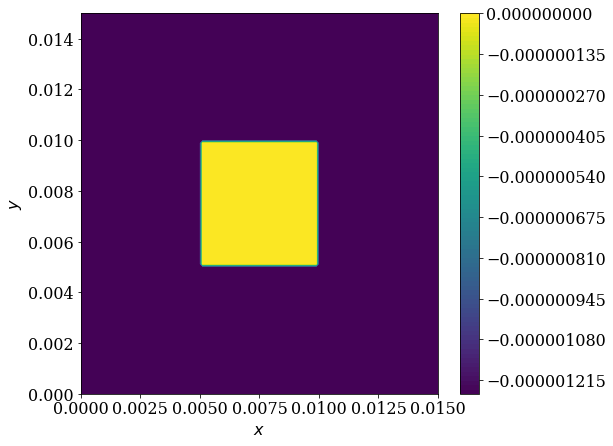

In [4]:
#un petit graphique du résultat final.
pyplot.figure(figsize=(8,7))
pyplot.contourf(x,y,B,120,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

## 4) Animation

In [5]:
HTML(ani.to_html5_video())

## 5) Valeur de B

$t=1.25\cdot 10^{-3}s$ correspond au 5000 ème incrément dans le temps. 

$(x,y,z)=(2.5\cdot 10^{-3}{\rm m},2.5\cdot 10^{-3}{\rm m},0{\rm m})$ correspond à la valeur $B[2,2]$ de notre array. 

Les valeurs ont déjà été prise dans le calcul principal de notre diffusion. 
 

In [6]:
print('B = (0,0,{} T),'.format(b))

B = (0,0,-1.2590604072712661e-06 T),


## 6) Valeur de J

Nous partons de l'expression :
$$\nabla \times {\bf B} =\mu_0 {\bf J}$$

ceci nous donne : 
$$ \bf J = \frac{\nabla \times \bf B}{\mu_0} = \left(\frac{\partial_y B_z}{\mu_0},\frac{- \partial_x B_z}{\mu_0},0 \right) $$

En utilisant une différence centrale pour ces dérivées partielles on en arrive à : 
$$ \bf J = \left(\frac{B[3,2]-B[1,2]}{2 \cdot \Delta y \cdot \mu_0},\frac{B[2,1]-B[2,3]}{2 \cdot \Delta x \cdot \mu_0},0\right) $$

In [7]:
print('J = ({},' .format(jx), '{},' .format(jy), '0) et est de norme {} A/m²' .format((jx**2 +jy**2)**(1/2)))

J = (2.9782447017624936, -2.9782447017624936, 0) et est de norme 4.2118740492983315 A/m²


## 7) Valeur du flux de B

Le flux correspond normalement à $$ \int{{\bf B}d_x d_y} $$
Qui se discretise comme étant la somme des valeurs de $\bf B$ multiplié par la surface. 

In [8]:
fl =0

for m in range(121):
    for n in range(121):
        fl = fl + B[m,n]

print('le flux du champ B = {} Tm²' .format(fl*(L*H)))

le flux du champ B = -3.719519999125529e-06 Tm²


# Fin.